In [1]:
from useful_scit.imps import *

In [27]:
pathD = '/homeappl/home/aliagadi/wrk/DONOTREMOVE/wrf_management_data/runs/run_2019_02_28_2'
pathE = '/proj/atm/saltena/runs/run_2019_02_28_2/'

In [41]:
def get_file_list(path):
    wrf_path = pjoin(path,'wrf') 
    fls = glob.glob(pjoin(wrf_path,'wrf*'))
    dffile = pd.DataFrame(fls,columns=['path'])
    b1 = ~dffile.path.str.contains('wrfout')
    b2 = ~dffile.path.str.contains('wrf.exe')
    dffile = dffile[b1 & b2]
    dffile['bname']=dffile.path.apply(lambda p: os.path.basename(p))
    dffile = dffile[['bname','path']]
    dffile = dffile.sort_values('bname')
    dffile = dffile.set_index('bname')
    return dffile



In [42]:
dffileD = get_file_list(pathD)
dffileD

,path
bname,
wrfbdy_d01,/homeappl/home/aliagadi/wrk/DONOTREMOVE/wrf_ma...
wrffdda_d01,/homeappl/home/aliagadi/wrk/DONOTREMOVE/wrf_ma...
wrfinput_d01,/homeappl/home/aliagadi/wrk/DONOTREMOVE/wrf_ma...
wrfinput_d02,/homeappl/home/aliagadi/wrk/DONOTREMOVE/wrf_ma...
wrfinput_d03,/homeappl/home/aliagadi/wrk/DONOTREMOVE/wrf_ma...
wrfinput_d04,/homeappl/home/aliagadi/wrk/DONOTREMOVE/wrf_ma...
wrflowinp_d01,/homeappl/home/aliagadi/wrk/DONOTREMOVE/wrf_ma...
wrflowinp_d02,/homeappl/home/aliagadi/wrk/DONOTREMOVE/wrf_ma...
wrflowinp_d03,/homeappl/home/aliagadi/wrk/DONOTREMOVE/wrf_ma...


In [43]:
dffileE = get_file_list(pathE)
dffileE

,path
bname,
wrfbdy_d01,/proj/atm/saltena/runs/run_2019_02_28_2/wrf/wr...
wrffdda_d01,/proj/atm/saltena/runs/run_2019_02_28_2/wrf/wr...
wrfinput_d01,/proj/atm/saltena/runs/run_2019_02_28_2/wrf/wr...
wrfinput_d02,/proj/atm/saltena/runs/run_2019_02_28_2/wrf/wr...
wrfinput_d03,/proj/atm/saltena/runs/run_2019_02_28_2/wrf/wr...
wrfinput_d04,/proj/atm/saltena/runs/run_2019_02_28_2/wrf/wr...
wrflowinp_d01,/proj/atm/saltena/runs/run_2019_02_28_2/wrf/wr...
wrflowinp_d02,/proj/atm/saltena/runs/run_2019_02_28_2/wrf/wr...
wrflowinp_d03,/proj/atm/saltena/runs/run_2019_02_28_2/wrf/wr...


In [44]:
di = dict(
    D = dict(f=dffileD),
    E = dict(f=dffileE)
)

In [110]:
keys = list(di.keys())

In [128]:
k = 'E'
def plot_lake(k,n):
    fls = di[k]['f']
    d = xr.open_dataset(fls.loc[n].path)

    cm = sns.blend_palette(sns.color_palette('Reds'),as_cmap=True)

    boo = d.LU_INDEX==17
    vmin = 275
    nc = 11
    mag = 2.5
    ret = d.SST.where(boo).plot(
        levels=nc,cmap=cm,
        vmin=vmin,vmax=vmin+(nc-1)*mag,
        x='XLONG',
        y='XLAT'
    )
    ax = ret.axes 
    ax.set_title(k)
    return  ret

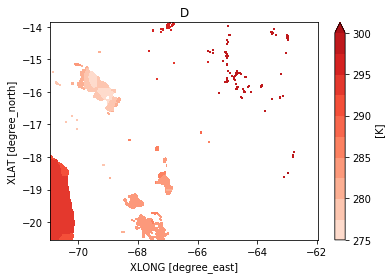

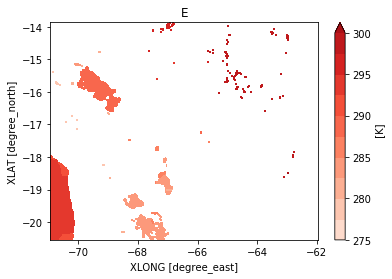

In [136]:
for k in keys:
    n = 'wrfinput_d03'
    plt.subplots()
    ret = plot_lake(k,n)

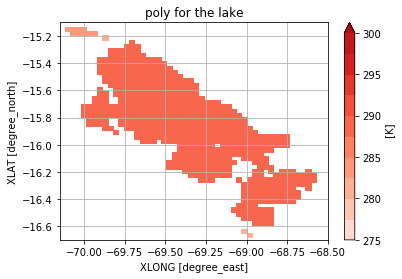

In [154]:
lak_la_min = -16.70
lak_la_max = -15.10
lak_lo_min = -70.15
lak_lo_max = -68.50
ret.axes.set_xlim(lak_lo_min,lak_lo_max)
ret.axes.set_ylim(lak_la_min,lak_la_max)
ret.axes.set_title('poly for the lake')
ret.axes.grid(True)
ret.axes.figure

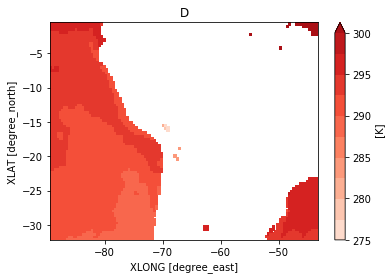

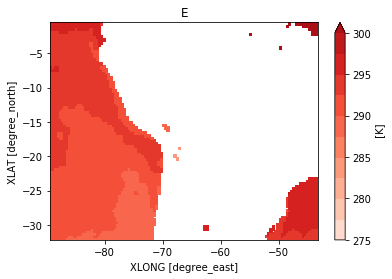

In [130]:
for k in keys:
    n = 'wrfinput_d01'
    plt.subplots()
    ret = plot_lake(k,n)

In [161]:
pp=dffileE.loc['wrflowinp_d03'].path

In [162]:
d = xr.open_dataset(pp)

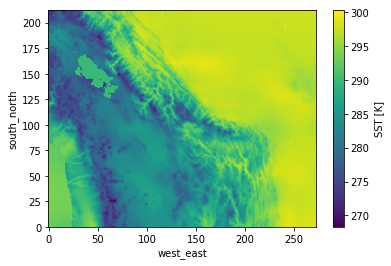

In [166]:
ax = d.SST[0].plot()
ax =ax.axes

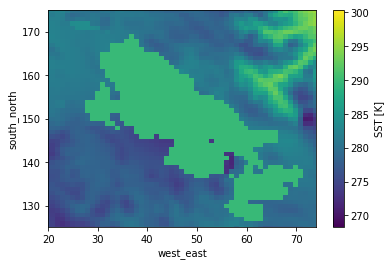

In [170]:
ax.set_xlim(20,74)
ax.set_ylim(125,175)
ax.figure

In [172]:
i3 = xr.open_dataset(
    dffileE.loc['wrfinput_d03'].path
)

In [173]:
l3 = xr.open_dataset(
    dffileE.loc['wrflowinp_d03'].path
)

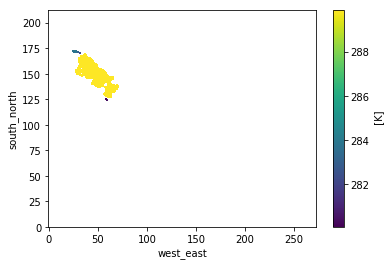

In [200]:
# %matplotlib inline
b1 = i3.LAKEMASK[0]==1
b2 = i3.XLAT[0]  >= lak_la_min
b3 = i3.XLAT[0]  <= lak_la_max
b4 = i3.XLONG[0] >= lak_lo_min
b5 = i3.XLONG[0] <= lak_lo_max
l3.SST.where(b1&b2&b3&b4&b5)[0].plot()

In [214]:
dfl = l3[['SST','Times']].where(b1&b2&b3&b4&b5,drop=True)
dfl = dfl.to_dataframe()

In [227]:
dfl1 = dfl.dropna().reset_index(drop='True')
dfl1 = dfl1.drop(['XLAT','XLONG'],axis=1)
# dfl1 = dfl1.set_index('Times')
dfl1.sample()

,SST,Times
274,289.890656,b'2017-12-02_00:00:00'


In [259]:
dfl1.Times=pd.to_datetime(dfl1.Times.str.decode('utf-8'),format='%Y-%m-%d_%H:%M:%S')

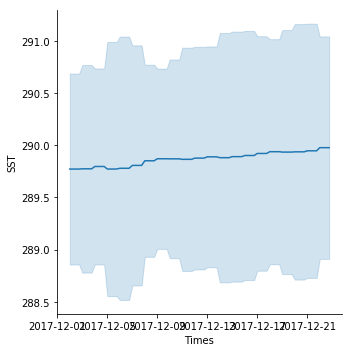

In [260]:
res = sns.relplot(x='Times',y='SST',data=dfl1,kind='line',ci='sd')

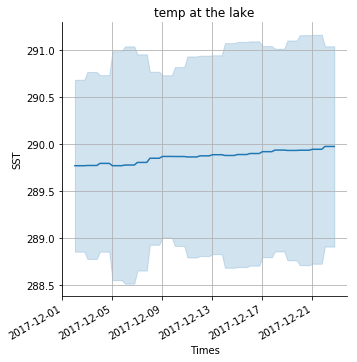

In [265]:
sns.set()
res.fig.autofmt_xdate()
res.ax.grid(True)
res.ax.set_title('temp at the lake')
res.fig